[[6.7, 2.2], [4.8, 1.4], [5.0, 1.7], [1.3, 0.2], [5.6, 2.4], [1.5, 0.1], [6.0, 2.5], [5.5, 2.1], [3.5, 1.0], [1.7, 0.2], [6.3, 1.8], [1.6, 0.6], [4.1, 1.3], [5.2, 2.0], [4.8, 1.8], [1.9, 0.2], [3.9, 1.2], [1.5, 0.2], [1.3, 0.2], [4.5, 1.3], [1.4, 0.2], [4.7, 1.2], [3.5, 1.0], [1.3, 0.4], [4.4, 1.2], [1.2, 0.2], [1.5, 0.1], [5.8, 2.2], [4.0, 1.2], [3.3, 1.0], [1.5, 0.4], [5.1, 2.3], [5.1, 1.9], [5.3, 1.9], [1.4, 0.3], [5.7, 2.1], [1.4, 0.2], [5.5, 1.8], [1.4, 0.2], [5.5, 1.8], [1.5, 0.1], [4.2, 1.3], [4.6, 1.3], [4.5, 1.5], [5.8, 1.8], [5.4, 2.1], [4.4, 1.4], [5.1, 1.9], [1.5, 0.1], [4.5, 1.7], [1.2, 0.2], [1.4, 0.1], [4.2, 1.5], [5.4, 2.3], [5.0, 1.9], [1.9, 0.4], [1.5, 0.3], [4.5, 1.5], [5.6, 1.4], [3.0, 1.1], [4.9, 2.0], [5.1, 2.4], [4.5, 1.5], [1.3, 0.3], [4.3, 1.3], [4.8, 1.8], [1.5, 0.2], [1.5, 0.2], [3.9, 1.1], [4.9, 1.8], [6.1, 2.3], [5.6, 2.1], [4.7, 1.4], [5.6, 1.8], [5.6, 2.4], [4.3, 1.3], [3.8, 1.1], [4.9, 1.5], [1.4, 0.3], [6.7, 2.0], [1.6, 0.2], [1.4, 0.2], [4.2, 1.3], [4.

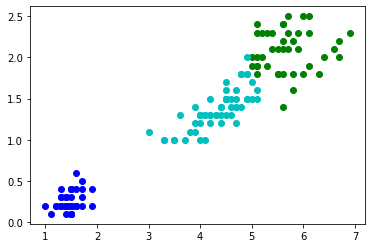

2


In [2]:
import math; 
import sys;
import pandas as pd
import numpy as np
from random import choice
from matplotlib import pyplot
from random import shuffle, uniform;



def ReadData(fileName):
    f = open(fileName,'r')
    lines = f.read().splitlines()
    f.close()

    items = []

    for i in range(1,len(lines)):
        line = lines[i].split(',')
        itemFeatures = []

        for j in range(len(line)-1):
            v = float(line[j])
            itemFeatures.append(v)
        items.append(itemFeatures)

    shuffle(items)

    return items


def FindColMinMax(items):
    n = len(items[0])
    minima = [float('inf') for i in range(n)]
    maxima = [float('-inf') -1 for i in range(n)]
    
    for item in items:
        for f in range(len(item)):
            if(item[f] < minima[f]):
                minima[f] = item[f]
            
            if(item[f] > maxima[f]):
                maxima[f] = item[f]

    return minima,maxima

def EuclideanDistance(x,y):
    S = 0
    for i in range(len(x)):
        S += math.pow(x[i]-y[i],2)

    return math.sqrt(S)

def InitializeMeans(items,k,cMin,cMax):
    f = len(items[0])
    means = [[0 for i in range(f)] for j in range(k)]
    
    for mean in means:
        for i in range(len(mean)):
            mean[i] = uniform(cMin[i]+1,cMax[i]-1)

    return means

def UpdateMean(n,mean,item):
    for i in range(len(mean)):
        m = mean[i]
        m = (m*(n-1)+item[i])/float(n)
        mean[i] = round(m,3)
    
    return mean


def FindClusters(means,items):
    clusters = [[] for i in range(len(means))]
    
    for item in items:
        index = Classify(means,item)
        clusters[index].append(item)

    return clusters

def Classify(means,item):
    
    minimum = float('inf');
    index = -1

    for i in range(len(means)):
        dis = EuclideanDistance(item,means[i])

        if(dis < minimum):
            minimum = dis
            index = i
    
    return index

def CalculateMeans(k,items,maxIterations=100000):
    cMin, cMax = FindColMinMax(items)
   
    means = InitializeMeans(items,k,cMin,cMax)
    
    clusterSizes = [0 for i in range(len(means))]

    belongsTo = [0 for i in range(len(items))]

    for e in range(maxIterations):
        noChange = True;
        for i in range(len(items)):
            item = items[i];
            index = Classify(means,item)
            clusterSizes[index] += 1
            cSize = clusterSizes[index]
            means[index] = UpdateMean(cSize,means[index],item)
  
            if(index != belongsTo[i]):
                noChange = False
            belongsTo[i] = index
  
        if (noChange):
            break
  
    return means

def CutToTwoFeatures(items,indexA,indexB):
    n = len(items)
    X = []
    for i in range(n):
        item = items[i]
        newItem = [item[indexA],item[indexB]]
        X.append(newItem)

    return X
        
def PlotClusters(clusters):
    n = len(clusters)
    X = [[] for i in range(n)]

    for i in range(n):
        cluster = clusters[i]
        for item in cluster:
            X[i].append(item)

    colors = ['r','b','g','c','m','y']

    for x in X:
        c = choice(colors)
        colors.remove(c)

        Xa = []
        Xb = []

        for item in x:
            Xa.append(item[0])
            Xb.append(item[1])

        pyplot.plot(Xa,Xb,'o',color=c)

    pyplot.show()


def main():
    items = ReadData('iris_dataset.txt')
    k = 3
    items = CutToTwoFeatures(items,2,3)
    print(items)
    means = CalculateMeans(k,items)
    print("\nMeans = ", means)

    clusters = FindClusters(means,items)
    
    PlotClusters(clusters)
    newItem = [1.5,0.2]
    print(Classify(means,newItem))

if __name__ == "__main__":
    main()